# Preparing Data

In [1]:
import pandas as pd 
import numpy as np
gmaps = pd.read_excel("/merge_11_cabang.xlsx")

gmaps.head()

,Source.Name,user_name,rating,snippet,date,iso_date,iso_date_of_last_edit
0,reviews_bogo.xlsx,Lucky Rivanto,5,Ok,7 months ago,2024-03-18 09:57:31,2024-03-18 09:57:31
1,reviews_bogo.xlsx,Novita Catur putri,5,Nice 🤗,2 years ago,2022-07-07 11:04:13,2022-07-07 11:04:13
2,reviews_bogo.xlsx,aditiya risky,5,very friendly service,2 years ago,2022-09-25 20:13:30,2022-09-25 20:13:30
3,reviews_bogo.xlsx,Fita Julia,5,Very good♥️,2 years ago,2022-07-07 12:59:32,2022-07-07 12:59:32
4,reviews_bogo.xlsx,M.choirul arif,5,"Harga lmyan terjangkau, tempatnya bersih ada p...",6 months ago,2024-05-01 17:00:28,2024-05-01 17:00:28


# Case Folding

In [2]:
# ------ Case Folding --------
# Using Series.str.lower() function on Pandas
gmaps['Text Case Folding'] = gmaps['snippet'].str.lower()


print('Case Folding Result : \n')
print(gmaps['Text Case Folding'].head(5))
print('\n\n\n')

Case Folding Result : 

0                                                   ok
1                                               nice 🤗
2                                very friendly service
3                                          very good♥️
4    harga lmyan terjangkau, tempatnya bersih ada p...
Name: Text Case Folding, dtype: object






# Tokenizing

In [3]:
import string
import re  # regex library
import nltk
from nltk.tokenize import word_tokenize  # import word_tokenize

# Tambahkan kode ini untuk mengunduh sumber daya yang diperlukan
nltk.download('punkt_tab')

# ------ Tokenizing ---------
def remove_tweet_special(text):
    text = str(text)
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\\w+:\\/\\/\\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

gmaps['Text Case Folding'] = gmaps['Text Case Folding'].fillna('').astype(str)
gmaps['Text Case Folding'] = gmaps['Text Case Folding'].apply(remove_tweet_special)

def remove_number(text):
    return re.sub(r"\d+", "", text)

gmaps['Text Case Folding'] = gmaps['Text Case Folding'].apply(remove_number)

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

gmaps['Text Case Folding'] = gmaps['Text Case Folding'].apply(remove_punctuation)

def remove_whitespace_LT(text):
    return text.strip()

gmaps['Text Case Folding'] = gmaps['Text Case Folding'].apply(remove_whitespace_LT)

def remove_whitespace_multiple(text):
    return re.sub(r'\s+', ' ', text)

gmaps['Text Case Folding'] = gmaps['Text Case Folding'].apply(remove_whitespace_multiple)

def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

gmaps['Text Case Folding'] = gmaps['Text Case Folding'].apply(remove_singl_char)

def word_tokenize_wrapper(text):
    return word_tokenize(text)

gmaps['Text Tokenizing'] = gmaps['Text Case Folding'].apply(word_tokenize_wrapper)

# Print results
print('Tokenizing Result : \n')
print(gmaps['Text Tokenizing'].head())


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Tokenizing Result : 

0                                                 [ok]
1                                               [nice]
2                            [very, friendly, service]
3                                         [very, good]
4    [harga, lmyan, terjangkau, tempatnya, bersih, ...
Name: Text Tokenizing, dtype: object


# Normalization

In [ ]:
normalizad_word = pd.read_excel("https://raw.githubusercontent.com/phik753/dataset/master/kamus_kata_baku1.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

gmaps['Text Normalization'] = gmaps['Text Tokenizing'].apply(normalized_term)

gmaps['Text Normalization'].head()

0                                                 [ok]
1                                               [nice]
2                            [very, friendly, service]
3                                         [very, baik]
4    [harga, lmyan, terjangkau, tempatnya, bersih, ...
Name: Text Normalization, dtype: object

# Stemming

In [34]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in gmaps['Text Normalization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

gmaps['Text Stemming'] = gmaps['Text Normalization'].swifter.apply(get_stemmed_term)
print(gmaps['Text Stemming'])

1890
------------------------
ok : ok
nice : nice
very : very
friendly : friendly
service : service
baik : baik
harga : harga
lmyan : lmyan
terjangkau : jangkau
tempatnya : tempat
bersih : bersih
ada : ada
playground : playground
untuk : untuk
anak : anak
pelayanan : layan
ramah : ramah
sat : sat
set : set
tempat : tempat
parkir : parkir
lumayan : lumayan
luas : luas
instagramable : instagramable
menunya : menu
banyak : banyak
pilihan : pilih
recomended : recomended
anakanak : anakanak
arena : arena
bermainnya : main
juga : juga
sambal : sambal
geprek : geprek
nya : nya
muantaaabbb : muantaaabbb
konsisten : konsisten
pedasnya : pedas
perubahan : ubah
yang : yang
awalnya : awal
berminyak : minyak
sekali : sekali
jadi : jadi
lebih : lebih
agak : agak
kering : kering
daun : daun
jeruk : jeruk
pedas : pedas
asinnya : asin
dapat : dapat
ayam : ayam
besar : besar
lho : lho
daripada : daripada
di : di
seberangnya : seberang
masih : masih
juicy : juicy
lagi : lagi
enggak : enggak
seperti : sep

Pandas Apply:   0%|          | 0/1048 [00:00<?, ?it/s]

0                                                    [ok]
1                                                  [nice]
2                               [very, friendly, service]
3                                            [very, baik]
4       [harga, lmyan, jangkau, tempat, bersih, ada, p...
                              ...                        
1043    [tempat, nyaman, bersih, luas, makan, juga, en...
1044                                                   []
1045                                                   []
1046                                                   []
1047                                                   []
Name: Text Stemming, Length: 1048, dtype: object


# Filtering

In [35]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'sdgkan', 'sdg', 'emg', 'sm', 'pls', 'mlu', 'ken',
                       'allah', 'brb', 'btw', 'b/c', 'cod', 'cmiiw', 'fyi',
                       'gg', 'ggwp', 'idk', 'ikr', 'lol', 'ootd', 'lmao', 'oot',
                       'pap', 'otw', 'tfl', 'vc', 'ygy'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
# txt_stopword = pd.read_csv("https://github.com/phik753/dataset/blob/master/stopwordbahasa.txt", names= ["stopwords"], header = None)
# Use the raw link of the GitHub file
txt_stopword_url = "https://raw.githubusercontent.com/phik753/dataset/master/stopwordbahasa.txt"

# Read the stopword text file
txt_stopword = pd.read_csv(txt_stopword_url, names=["stopwords"], header=None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

gmaps['Text Filtering'] = gmaps['Text Stemming'].apply(stopwords_removal) 


print(gmaps['Text Filtering'].head())

0                                                 [ok]
1                                               [nice]
2                            [very, friendly, service]
3                                               [very]
4    [harga, lmyan, jangkau, bersih, playground, an...
Name: Text Filtering, dtype: object


# View Preprocessing Results

In [15]:
gmaps.head()

,Source.Name,user_name,rating,snippet,date,iso_date,iso_date_of_last_edit,Text Case Folding,Text Tokenizing,Text Normalization,Text Stemming,Text Filtering
0,reviews_bogo.xlsx,Lucky Rivanto,5,Ok,7 months ago,2024-03-18 09:57:31,2024-03-18 09:57:31,ok,[ok],[ok],[ok],[ok]
1,reviews_bogo.xlsx,Novita Catur putri,5,Nice 🤗,2 years ago,2022-07-07 11:04:13,2022-07-07 11:04:13,nice,[nice],[nice],[nice],[nice]
2,reviews_bogo.xlsx,aditiya risky,5,very friendly service,2 years ago,2022-09-25 20:13:30,2022-09-25 20:13:30,very friendly service,"[very, friendly, service]","[very, friendly, service]","[very, friendly, service]","[very, friendly, service]"
3,reviews_bogo.xlsx,Fita Julia,5,Very good♥️,2 years ago,2022-07-07 12:59:32,2022-07-07 12:59:32,very good,"[very, good]","[very, good]","[very, good]","[very, good]"
4,reviews_bogo.xlsx,M.choirul arif,5,"Harga lmyan terjangkau, tempatnya bersih ada p...",6 months ago,2024-05-01 17:00:28,2024-05-01 17:00:28,harga lmyan terjangkau tempatnya bersih ada pl...,"[harga, lmyan, terjangkau, tempatnya, bersih, ...","[harga, lmyan, terjangkau, tempatnya, bersih, ...","[harga, lmyan, jangkau, tempat, bersih, ada, p...","[harga, lmyan, jangkau, bersih, playground, an..."


# Save Preprocessing Results

In [16]:
gmaps.to_csv("preprocessing results", index=False)

# Delete Unnecessary Data

In [19]:
df= gmaps.drop(columns=['snippet', 'Text Case Folding', 'Text Tokenizing', 'Text Normalization', 'Text Stemming'])
df.head()

,Source.Name,user_name,rating,date,iso_date,iso_date_of_last_edit,Text Filtering
0,reviews_bogo.xlsx,Lucky Rivanto,5,7 months ago,2024-03-18 09:57:31,2024-03-18 09:57:31,[ok]
1,reviews_bogo.xlsx,Novita Catur putri,5,2 years ago,2022-07-07 11:04:13,2022-07-07 11:04:13,[nice]
2,reviews_bogo.xlsx,aditiya risky,5,2 years ago,2022-09-25 20:13:30,2022-09-25 20:13:30,"[very, friendly, service]"
3,reviews_bogo.xlsx,Fita Julia,5,2 years ago,2022-07-07 12:59:32,2022-07-07 12:59:32,"[very, good]"
4,reviews_bogo.xlsx,M.choirul arif,5,6 months ago,2024-05-01 17:00:28,2024-05-01 17:00:28,"[harga, lmyan, jangkau, bersih, playground, an..."


# Labeling Using Inset Lexicon

In [22]:
lexicon_positive = pd.read_excel('https://raw.githubusercontent.com/phik753/dataset/master/kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('https://raw.githubusercontent.com/phik753/dataset/master/kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in text:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'Positive'
    elif (score < 0):
        sentimen = 'Negative'
    else:
        sentimen = 'Neutral'
    return score, sentimen

results = df['Text Filtering'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['Polarity Score'] = results[0]
df['Indonesia Sentiment'] = results[1]
#data['sentimen'] = results[1]
#data

df[['Text Filtering','Polarity Score','Indonesia Sentiment']]

,Text Filtering,Polarity Score,Indonesia Sentiment
0,[ok],4,Positive
1,[nice],4,Positive
2,"[very, friendly, service]",0,Neutral
3,"[very, good]",5,Positive
4,"[harga, lmyan, jangkau, bersih, playground, an...",5,Positive
...,...,...,...
1043,"[nyaman, bersih, luas, makan, enak, rekomended...",7,Positive
1044,[],0,Neutral
1045,[],0,Neutral
1046,[],0,Neutral


## Sentiment Cumulative Results

In [23]:
inset_counts = df['Indonesia Sentiment'].value_counts()
inset_counts

Indonesia Sentiment
Positive    566
Neutral     358
Negative    124
Name: count, dtype: int64

## Save Labeling Results

In [24]:
df.to_csv("sentiment results", index=False)

## Labeling Results Visualization

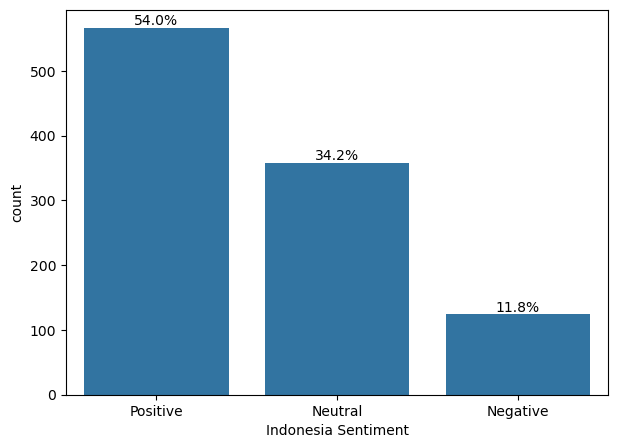

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5));
g = sns.countplot(x='Indonesia Sentiment', data=df)

ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
         textcoords='offset points')

In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv("sentiment results")

df

,Source.Name,user_name,rating,date,iso_date,iso_date_of_last_edit,Text Filtering,Polarity Score,Indonesia Sentiment
0,reviews_bogo.xlsx,Lucky Rivanto,5,7 months ago,2024-03-18 09:57:31,2024-03-18 09:57:31,['ok'],4,Positive
1,reviews_bogo.xlsx,Novita Catur putri,5,2 years ago,2022-07-07 11:04:13,2022-07-07 11:04:13,['nice'],4,Positive
2,reviews_bogo.xlsx,aditiya risky,5,2 years ago,2022-09-25 20:13:30,2022-09-25 20:13:30,"['very', 'friendly', 'service']",0,Neutral
3,reviews_bogo.xlsx,Fita Julia,5,2 years ago,2022-07-07 12:59:32,2022-07-07 12:59:32,"['very', 'good']",5,Positive
4,reviews_bogo.xlsx,M.choirul arif,5,6 months ago,2024-05-01 17:00:28,2024-05-01 17:00:28,"['harga', 'lmyan', 'jangkau', 'bersih', 'playg...",5,Positive
...,...,...,...,...,...,...,...,...,...
1043,reviews_warujayeng.xlsx,Dewi Anggraini,5,5 days ago,2024-11-03 13:09:57,2024-11-03 13:43:08,"['nyaman', 'bersih', 'luas', 'makan', 'enak', ...",7,Positive
1044,reviews_warujayeng.xlsx,Triana Aditya,3,11 months ago,2023-11-28 10:57:54,2023-11-28 10:57:54,[],0,Neutral
1045,reviews_warujayeng.xlsx,Hadi Suprapto,5,a year ago,2023-05-18 21:12:45,2023-05-19 22:55:29,[],0,Neutral
1046,reviews_warujayeng.xlsx,Rendy Eko,5,a year ago,2023-02-12 13:56:27,2023-02-12 13:56:27,[],0,Neutral


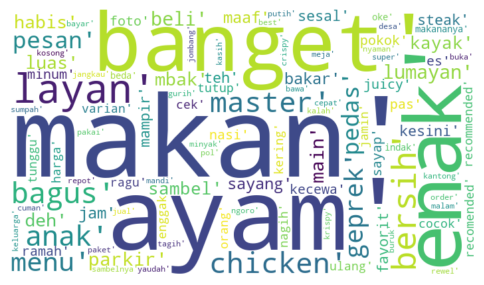

In [28]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Negative']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

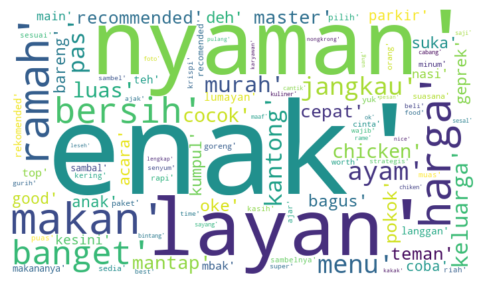

In [29]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Positive']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

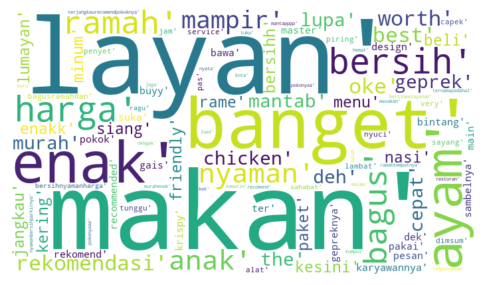

In [30]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Neutral']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Modeling Data

## Inset Count Vectorizer

In [31]:
import pandas as pd
import numpy as np

df_inset = pd.read_csv("sentiment results")

df_inset

,Source.Name,user_name,rating,date,iso_date,iso_date_of_last_edit,Text Filtering,Polarity Score,Indonesia Sentiment
0,reviews_bogo.xlsx,Lucky Rivanto,5,7 months ago,2024-03-18 09:57:31,2024-03-18 09:57:31,['ok'],4,Positive
1,reviews_bogo.xlsx,Novita Catur putri,5,2 years ago,2022-07-07 11:04:13,2022-07-07 11:04:13,['nice'],4,Positive
2,reviews_bogo.xlsx,aditiya risky,5,2 years ago,2022-09-25 20:13:30,2022-09-25 20:13:30,"['very', 'friendly', 'service']",0,Neutral
3,reviews_bogo.xlsx,Fita Julia,5,2 years ago,2022-07-07 12:59:32,2022-07-07 12:59:32,"['very', 'good']",5,Positive
4,reviews_bogo.xlsx,M.choirul arif,5,6 months ago,2024-05-01 17:00:28,2024-05-01 17:00:28,"['harga', 'lmyan', 'jangkau', 'bersih', 'playg...",5,Positive
...,...,...,...,...,...,...,...,...,...
1043,reviews_warujayeng.xlsx,Dewi Anggraini,5,5 days ago,2024-11-03 13:09:57,2024-11-03 13:43:08,"['nyaman', 'bersih', 'luas', 'makan', 'enak', ...",7,Positive
1044,reviews_warujayeng.xlsx,Triana Aditya,3,11 months ago,2023-11-28 10:57:54,2023-11-28 10:57:54,[],0,Neutral
1045,reviews_warujayeng.xlsx,Hadi Suprapto,5,a year ago,2023-05-18 21:12:45,2023-05-19 22:55:29,[],0,Neutral
1046,reviews_warujayeng.xlsx,Rendy Eko,5,a year ago,2023-02-12 13:56:27,2023-02-12 13:56:27,[],0,Neutral


## Splitting the Data

In [ ]:
# Define Y (This is the value we will predict)
X = df_inset["Text Filtering"]
y = df_inset["Indonesia Sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Data:", len(X_train))
print("Test Data:", len(X_test))

## Implementation Count Vectorizer

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('indonesian'))
response = count_vectorizer.fit_transform(X_train)

In [ ]:
df_countvectorizer = pd.DataFrame(response.toarray(), columns=count_vectorizer.get_feature_names())
df_countvectorizer.head()

## Tranforming the Dataset

In [ ]:
X_train = count_vectorizer.transform(X_train)
X_test  = count_vectorizer.transform(X_test)
print(f'Inset Count Data Transformed.')

## Evaluate Model Function

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
text_classifier.fit(X_train, y_train)

In [ ]:
count_predictions = text_classifier.predict(X_test)

## Random Forest Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,count_predictions)
cr = classification_report(y_test,count_predictions)
rf_cv = accuracy_score(y_test,count_predictions)
print('Confusion matrix: \n',cm)
print('Classification report: \n',cr)
print(f'Inset Random Forest Classifier on Count Vectors: {rf_cv}')

# plot confusion matrix 
plt.figure(figsize=(6,4))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Aktual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

## Inset TF-IDF

In [ ]:
import pandas as pd
import numpy as np

df_inset1 = pd.read_csv("sentiment results")

df_inset1

## Splitting the Data

In [ ]:
# Define Y (This is the value we will predict)
X = df_inset1["Text Filtering"]
y = df_inset1["Indonesia Sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Data:", len(X_train))
print("Test Data:", len(X_test))

## Implementation TF-IDF

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('indonesian'))
response = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
df_tfidf_vectorizer= pd.DataFrame(response.toarray(), columns=tfidf_vectorizer.get_feature_names())
df_tfidf_vectorizer.head()

## Tranforming the Dataset

In [ ]:
X_train = tfidf_vectorizer.transform(X_train)
X_test  = tfidf_vectorizer.transform(X_test)
print(f'Inset TF IDF Data Transformed.')

## Evaluate Model Function 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier1 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
text_classifier1.fit(X_train, y_train)

In [ ]:
tfidf_predictions = text_classifier1.predict(X_test)

## Random Forest Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test,tfidf_predictions)
cr1 = classification_report(y_test,tfidf_predictions)
rf_tfidf1 = accuracy_score(y_test,tfidf_predictions)
print('Confusion matrix: \n',cm1)
print('Classification report: \n',cr1)
print(f'Inset Random Forest Classifier on TF-IDF Vectors: {rf_tfidf1}')

# plot confusion matrix 
plt.figure(figsize=(6,4))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm1, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Aktual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

## Comparison of Word Weighting Results

In [ ]:
import pandas as pd
model = {'Model':['Inset Random Forest Classifier - Count Vectors',
                  'Inset Random Forest Classifier - TFIDF Vectors',
                 ],
         'Accuracy Score':[rf_cv, rf_tfidf1]
         }
model_df = pd.DataFrame(model)
model_df